In [1]:
from os import listdir
from os.path import isfile, join

from fastai.vision.all import *

In [2]:
image_path = join("..", "petfinder-pawpularity-score", "train")
images = [f for f in listdir(image_path) if isfile(join(image_path, f))]

In [3]:
img = PILImage(PILImage.create(join(image_path,images[1])).resize((500,500)))

In [4]:
timg = TensorImage(array(img)).permute(2,0,1).float()/255.
def _batch_ex(bs):
    return TensorImage(timg[None].expand(bs, *timg.shape).clone())

In [5]:
def custom_show_images(ims, nrows=1, ncols=None, titles=None, figname=None, figsize=None, **kwargs):
    "Show all images `ims` as subplots with `rows` using `titles`."
    if ncols is None: ncols = int(math.ceil(len(ims)/nrows))
    if titles is None: titles = [None]*len(ims)
    axs = subplots(nrows, ncols, **kwargs)[1].flat
    for im,t,ax in zip(ims, titles, axs):
        show_image(im, ax=ax, title=t, figsize=figsize)
    plt.savefig(figname)


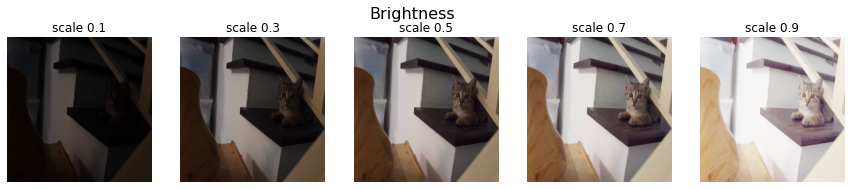

In [11]:
scales = [0.1, 0.3, 0.5, 0.7, 0.9]
y = _batch_ex(5).brightness(draw=scales, p=1.)
fig, axs = plt.subplots(1, 5, figsize=(15,3))
fig.suptitle('Brightness', fontsize=16)
for i,ax in enumerate(axs.flatten()):
    show_image(y[i], ctx=ax, title=f'scale {scales[i]}')
plt.savefig("brightness.png")

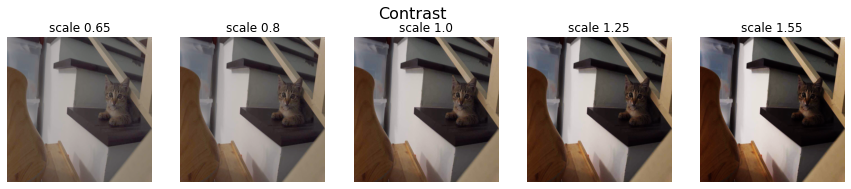

In [12]:
scales = [0.65, 0.8, 1., 1.25, 1.55]
y = _batch_ex(5).contrast(p=1., draw=scales)
fig,axs = plt.subplots(1, 5, figsize=(15,3))
fig.suptitle('Contrast', fontsize=16)
for i,ax in enumerate(axs.flatten()):
    show_image(y[i], ctx=ax, title=f'scale {scales[i]}')
plt.savefig("contrast.png")

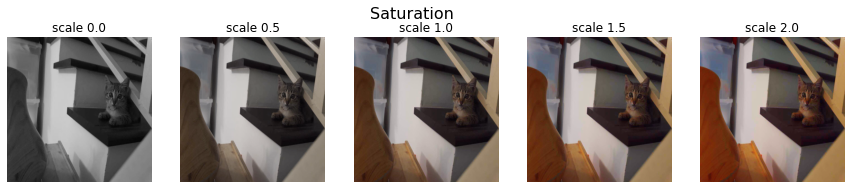

In [13]:
scales = [0., 0.5, 1., 1.5, 2.0]
y = _batch_ex(5).saturation(p=1., draw=scales)
fig,axs = plt.subplots(1, 5, figsize=(15,3))
fig.suptitle('Saturation', fontsize=16)
for i,ax in enumerate(axs.flatten()):
    show_image(y[i], ctx=ax, title=f'scale {scales[i]}')
plt.savefig("saturation.png")

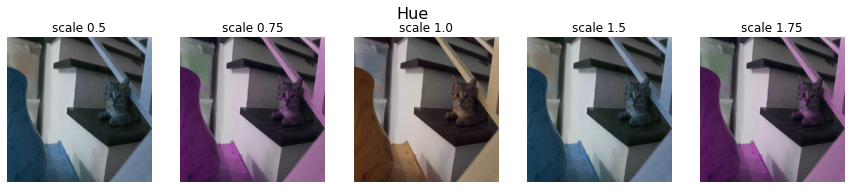

In [14]:
scales = [0.5, 0.75, 1., 1.5, 1.75]
y = _batch_ex(len(scales)).hue(p=1., draw=scales)
fig,axs = plt.subplots(1,len(scales), figsize=(15,3))
fig.suptitle('Hue', fontsize=16)
for i,ax in enumerate(axs.flatten()):
    show_image(y[i], ctx=ax, title=f'scale {scales[i]}')
plt.savefig("hue.png")

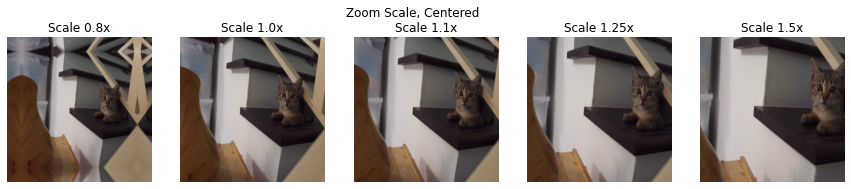

In [17]:
with no_random():
    scales = [0.8, 1., 1.1, 1.25, 1.5]
    imgs = _batch_ex(5)
    listy = Zoom(p=1.,draw=scales,draw_x=0.5, draw_y=0.5) #completely manual scales, constant center
    custom_show_images( listy(imgs) ,suptitle='Zoom Scale, Centered',
                        titles=[f'Scale {i}x' for i in scales], figname="zoom.png", figsize=(20,20))

C:\Users\th-br\anaconda3\envs\petfinder\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


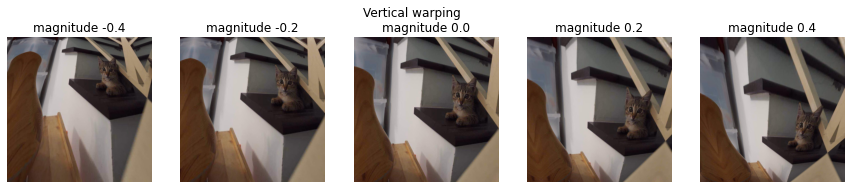

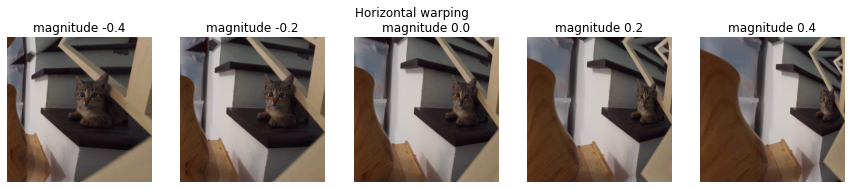

In [16]:
scales = [-0.4, -0.2, 0., 0.2, 0.4]
imgs=_batch_ex(5)
vert_warp = Warp(p=1., draw_y=scales, draw_x=0.)
horz_warp = Warp(p=1., draw_x=scales, draw_y=0.)
custom_show_images( vert_warp(imgs) ,suptitle='Vertical warping',
                    titles=[f'magnitude {i}' for i in scales], figname="vert_warp.png", figsize=(10,10))
custom_show_images( horz_warp(imgs) ,suptitle='Horizontal warping', titles=[f'magnitude {i}' for i in scales], figname="horz_warp.png", figsize=(10,10))